In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV, ElasticNetCV, LassoCV,BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Understand Data

In [ ]:
train_df = pd.read_csv("sample_submission.csv")

In [3]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

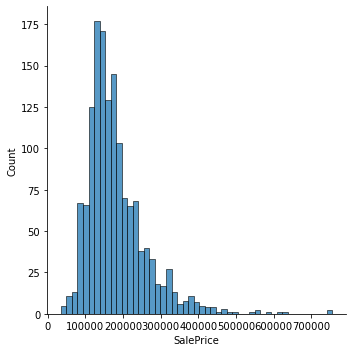

In [6]:
sns.displot(train_df['SalePrice']);

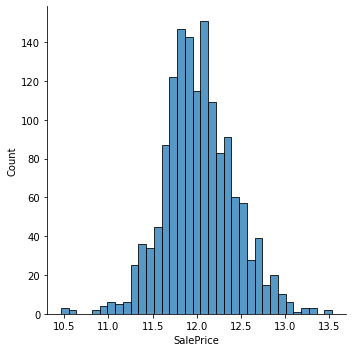

In [7]:
sns.displot(np.log(train_df["SalePrice"]))

### Find the best columns for the actual training

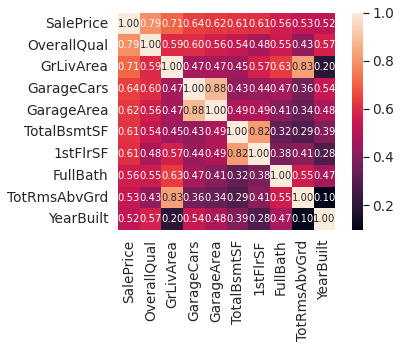

In [8]:
corrmat = train_df.corr()
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

In [9]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [10]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

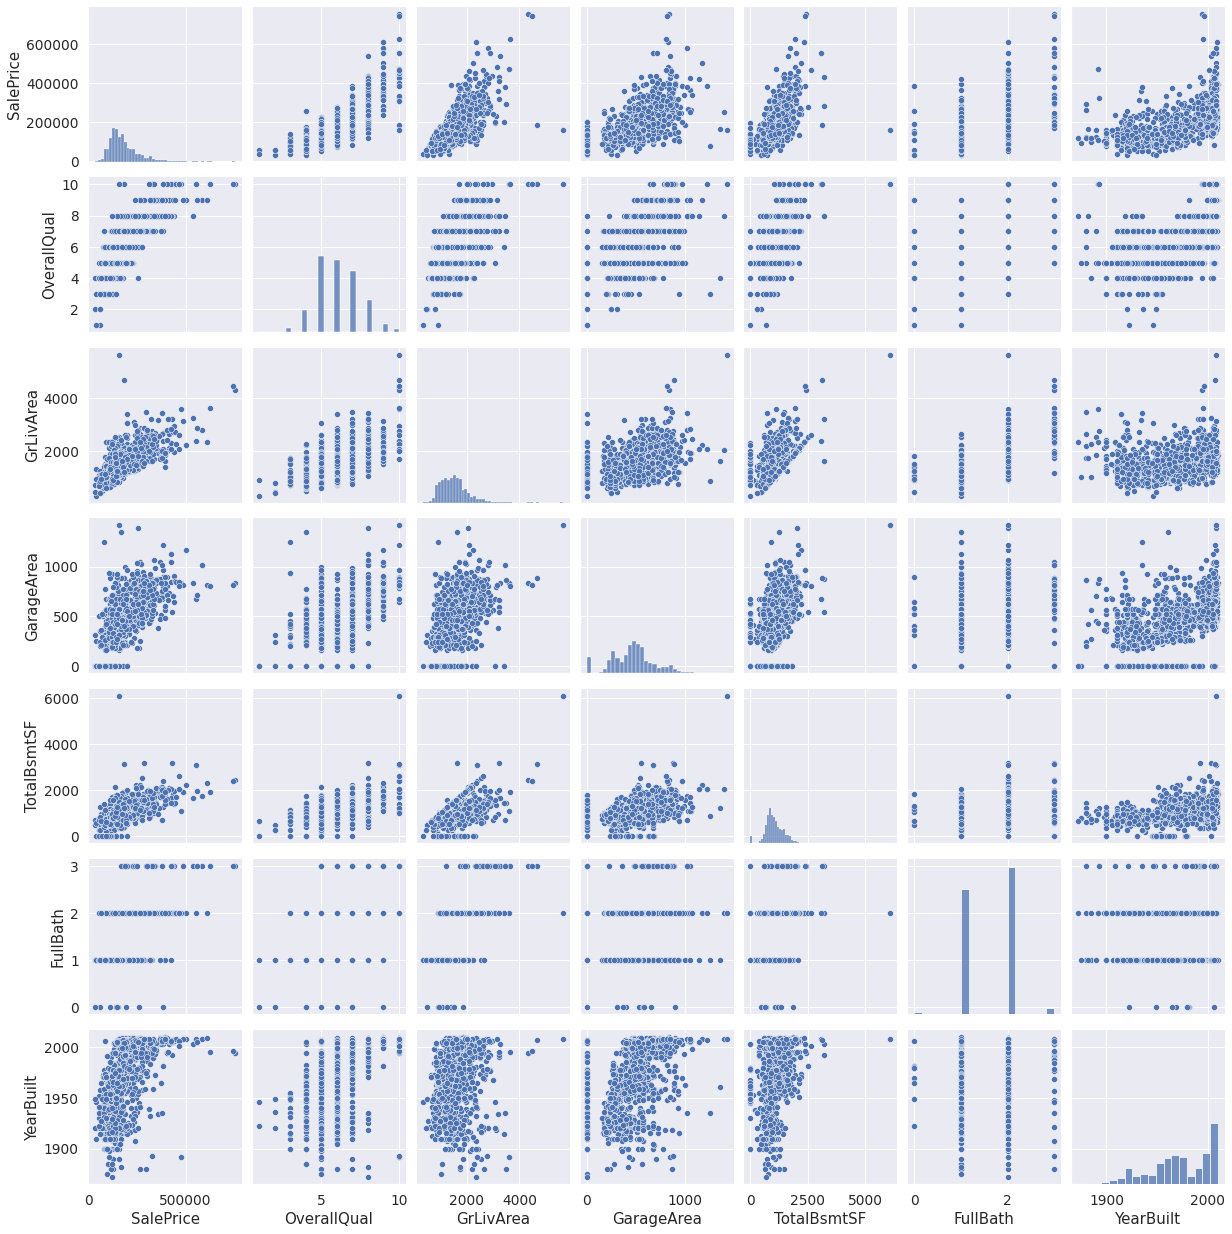

In [11]:
sns.pairplot(train_df[cols], height = 2.5)

In [12]:
train_df = train_df[train_df.GrLivArea <4000]

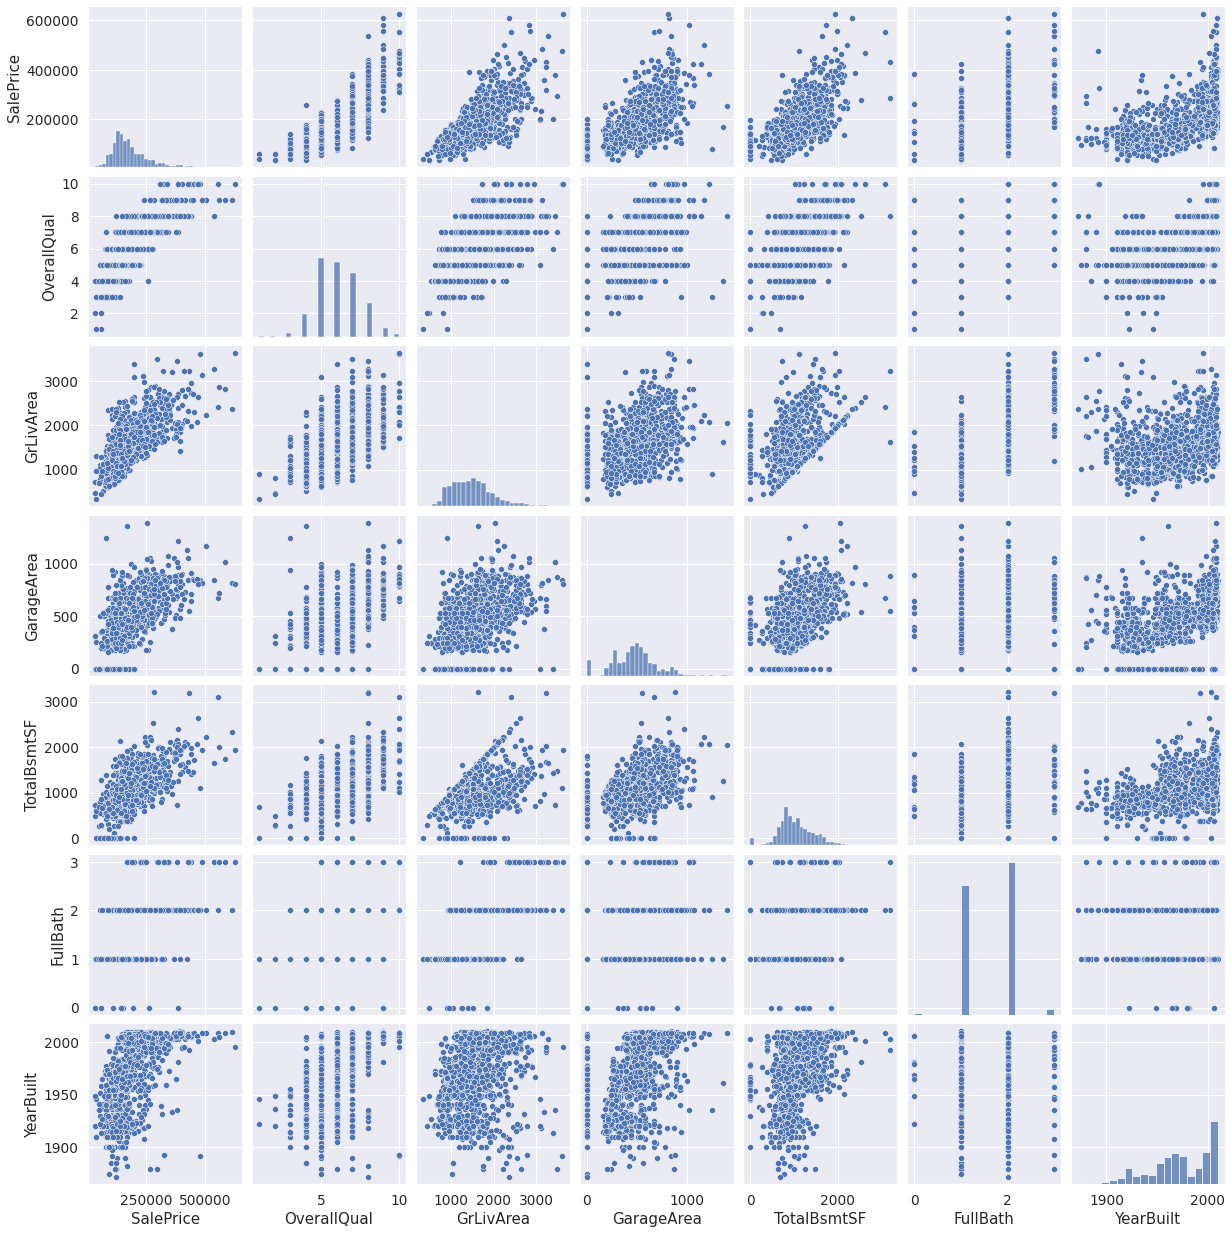

In [13]:
sns.pairplot(train_df[cols], height = 2.5)

### This is the final df with best features 

In [14]:
train_df.corr()['SalePrice'] 

Id              -0.027455
MSSubClass      -0.088160
LotFrontage      0.356773
LotArea          0.269866
OverallQual      0.800858
OverallCond     -0.080202
YearBuilt        0.535279
YearRemodAdd     0.521428
MasVnrArea       0.478862
BsmtFinSF1       0.395923
BsmtFinSF2      -0.008900
BsmtUnfSF        0.220678
TotalBsmtSF      0.646584
1stFlrSF         0.625235
2ndFlrSF         0.297301
LowQualFinSF    -0.025351
GrLivArea        0.720516
BsmtFullBath     0.235697
BsmtHalfBath    -0.036792
FullBath         0.559048
HalfBath         0.282925
BedroomAbvGr     0.160542
KitchenAbvGr    -0.138849
TotRmsAbvGrd     0.537462
Fireplaces       0.466765
GarageYrBlt      0.499230
GarageCars       0.649256
GarageArea       0.636964
WoodDeckSF       0.322538
OpenPorchSF      0.330361
EnclosedPorch   -0.129774
3SsnPorch        0.047414
ScreenPorch      0.118324
PoolArea         0.032819
MiscVal         -0.021097
MoSold           0.056797
YrSold          -0.023694
SalePrice        1.000000
Name: SalePr

In [15]:
#cols = ['OverallQual','YearBuilt','YearRemodAdd','BsmtFinSF1','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','SalePrice']

In [16]:
train_df = train_df[cols]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   SalePrice    1456 non-null   int64
 1   OverallQual  1456 non-null   int64
 2   GrLivArea    1456 non-null   int64
 3   GarageArea   1456 non-null   int64
 4   TotalBsmtSF  1456 non-null   int64
 5   FullBath     1456 non-null   int64
 6   YearBuilt    1456 non-null   int64
dtypes: int64(7)
memory usage: 123.3 KB


#### No NUll Values

In [17]:
# duplicate rows
print(train_df.duplicated().sum())

#drop duplicates
train_df.drop_duplicates(inplace=True)

0


In [18]:
X_cols = cols.copy()
X = train_df[X_cols[1:]]
X.info()

y_col = cols[0]
y = train_df[y_col]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1456 non-null   int64
 1   GrLivArea    1456 non-null   int64
 2   GarageArea   1456 non-null   int64
 3   TotalBsmtSF  1456 non-null   int64
 4   FullBath     1456 non-null   int64
 5   YearBuilt    1456 non-null   int64
dtypes: int64(6)
memory usage: 79.6 KB


In [19]:
# use of inbuilt function train_test_split from sklearn to split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(975, 6)
(481, 6)
(975,)
(481,)


In [21]:
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

In [22]:
model_comp={}

### Linear Reagression

In [23]:
LR_model = LinearRegression()

LR_scores = cross_val_score(LR_model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
LR_mean_score = LR_scores.mean()
LR_std_score = LR_scores.std()
print(f"RMSE = {LR_scores}")
print(f"Mean RMSE = {LR_mean_score:.2f}")
print(f"StDev RMSE = {LR_std_score:.2f}")

model_comp['LR']=[LR_mean_score, LR_std_score]

RMSE = [-35273.46229301 -34393.52395777 -29447.95531068 -39741.79445221
 -30956.07598426]
Mean RMSE = -33962.56
StDev RMSE = 3597.90


In [24]:
LR_model_norm = LinearRegression()

LR_with_trans_target = TransformedTargetRegressor(
    regressor=LR_model_norm, func=np.log, inverse_func=np.exp)

LR_scores_norm = cross_val_score(LR_with_trans_target, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
LR_mean_score_norm = LR_scores_norm.mean()
LR_std_score_norm = LR_scores_norm.std()
print(f"RMSE = {LR_scores_norm}")
print(f"Mean RMSE = {LR_mean_score_norm:.2f}")
print(f"StDev RMSE = {LR_std_score_norm:.2f}")

model_comp['LR_norm']=[LR_mean_score_norm, LR_std_score_norm]

RMSE = [-29741.40047757 -27491.854954   -25283.54572651 -35141.60765991
 -25038.93719239]
Mean RMSE = -28539.47
StDev RMSE = 3714.43


### Decision Tree

In [25]:
DT_model = DecisionTreeRegressor(random_state=0)

DT_scores = cross_val_score(DT_model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
DT_mean_score = DT_scores.mean()
DT_std_score = DT_scores.std()
print(f"RMSE = {DT_scores}")
print(f"Mean RMSE = {DT_mean_score:.2f}")
print(f"StDev RMSE = {DT_std_score:.2f}")

model_comp['DT']=[DT_mean_score, DT_std_score]

RMSE = [-50310.28096992 -38660.37118576 -42065.16248381 -38642.14456656
 -37448.93026236]
Mean RMSE = -41425.38
StDev RMSE = 4702.23


In [26]:
DT_model_norm = DecisionTreeRegressor(random_state=0)

DT_with_trans_target = TransformedTargetRegressor(
    regressor=DT_model_norm, func=np.log, inverse_func=np.exp)

DT_scores_norm = cross_val_score(DT_with_trans_target, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
DT_mean_score_norm = DT_scores_norm.mean()
DT_std_score_norm = DT_scores_norm.std()
print(f"RMSE = {DT_scores_norm}")
print(f"Mean RMSE = {DT_mean_score_norm:.2f}")
print(f"StDev RMSE = {DT_std_score_norm:.2f}")

model_comp['DT_norm']=[DT_mean_score_norm, DT_std_score_norm]

RMSE = [-50199.49991231 -51350.16906683 -31022.11174945 -49880.35344259
 -42140.59909295]
Mean RMSE = -44918.55
StDev RMSE = 7677.26


### Random Forest Regressor

In [27]:
RF_model = RandomForestRegressor(random_state=0)

RF_scores = cross_val_score(RF_model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
RF_mean_score = RF_scores.mean()
RF_std_score = RF_scores.std()
print(f"RMSE = {RF_scores}")
print(f"Mean RMSE = {RF_mean_score:.2f}")
print(f"StDev RMSE = {RF_std_score:.2f}")

model_comp['RF']=[RF_mean_score, RF_std_score]

RMSE = [-34125.19953822 -32825.90467873 -27246.82126276 -35531.48787274
 -26902.3380606 ]
Mean RMSE = -31326.35
StDev RMSE = 3577.15


In [28]:
RF_model_norm = RandomForestRegressor(random_state=0)

RF_with_trans_target = TransformedTargetRegressor(
    regressor=RF_model_norm, func=np.log, inverse_func=np.exp)

RF_scores_norm = cross_val_score(RF_with_trans_target, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
RF_mean_score_norm = RF_scores_norm.mean()
RF_std_score_norm = RF_scores_norm.std()
print(f"RMSE = {RF_scores_norm}")
print(f"Mean RMSE = {RF_mean_score_norm:.2f}")
print(f"StDev RMSE = {RF_std_score_norm:.2f}")

model_comp['RF_norm']=[RF_mean_score_norm, RF_std_score_norm]

RMSE = [-35551.62481598 -33643.02544486 -29719.24969491 -37914.65714302
 -28047.30657804]
Mean RMSE = -32975.17
StDev RMSE = 3643.28


### KNeighbors Regressor

In [29]:
KN_model = KNeighborsRegressor()

KN_scores = cross_val_score(KN_model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
KN_mean_score = KN_scores.mean()
KN_std_score = KN_scores.std()
print(f"RMSE = {KN_scores}")
print(f"Mean RMSE = {KN_mean_score:.2f}")
print(f"StDev RMSE = {KN_std_score:.2f}")

model_comp['KN']=[KN_mean_score, KN_std_score]

RMSE = [-34575.50548507 -31310.08712058 -31963.00526819 -37937.92222094
 -26047.23344835]
Mean RMSE = -32366.75
StDev RMSE = 3927.66


In [30]:
KN_model_norm = KNeighborsRegressor()

KN_with_trans_target = TransformedTargetRegressor(
    regressor=KN_model_norm, func=np.log, inverse_func=np.exp)

KN_scores_norm = cross_val_score(KN_with_trans_target, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
KN_mean_score_norm = KN_scores_norm.mean()
KN_std_score_norm = KN_scores_norm.std()
print(f"RMSE = {KN_scores_norm}")
print(f"Mean RMSE = {KN_mean_score_norm:.2f}")
print(f"StDev RMSE = {KN_std_score_norm:.2f}")

model_comp['KN_norm']=[KN_mean_score_norm, KN_std_score_norm]

RMSE = [-35001.694351   -31066.62940683 -32473.4711471  -38151.04809706
 -26733.25981655]
Mean RMSE = -32685.22
StDev RMSE = 3829.67


### Gradient Boosting Regressor

In [31]:
GBR_model = GradientBoostingRegressor(random_state=0)

GBR_scores = cross_val_score(GBR_model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
GBR_mean_score = GBR_scores.mean()
GBR_std_score = GBR_scores.std()
print(f"RMSE = {GBR_scores}")
print(f"Mean RMSE = {GBR_mean_score:.2f}")
print(f"StDev RMSE = {GBR_std_score:.2f}")

model_comp['GBR']=[GBR_mean_score, GBR_std_score]

RMSE = [-35157.39706428 -30624.13349133 -26162.75534912 -35424.64544586
 -25713.85927316]
Mean RMSE = -30616.56
StDev RMSE = 4185.92


In [32]:
GBR_model_norm = GradientBoostingRegressor(random_state=0)

GBR_with_trans_target = TransformedTargetRegressor(
    regressor=GBR_model_norm, func=np.log, inverse_func=np.exp)

GBR_scores_norm = cross_val_score(GBR_with_trans_target, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
GBR_mean_score_norm = GBR_scores_norm.mean()
GBR_std_score_norm = GBR_scores_norm.std()
print(f"RMSE = {GBR_scores_norm}")
print(f"Mean RMSE = {GBR_mean_score_norm:.2f}")
print(f"StDev RMSE = {GBR_std_score_norm:.2f}")

model_comp['GBR_norm']=[GBR_mean_score_norm, GBR_std_score_norm]

RMSE = [-35400.48709789 -28063.31050074 -26894.60938509 -34728.67368038
 -25838.37714155]
Mean RMSE = -30185.09
StDev RMSE = 4051.36


### XGB Regressor

In [33]:
XGB_model = XGBRegressor(random_state=0)

XGB_scores = cross_val_score(XGB_model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
XGB_mean_score = XGB_scores.mean()
XGB_std_score = XGB_scores.std()
print(f"RMSE = {XGB_scores}")
print(f"Mean RMSE = {XGB_mean_score:.2f}")
print(f"StDev RMSE = {XGB_std_score:.2f}")

model_comp['XGB']=[XGB_mean_score, XGB_std_score]

RMSE = [-37242.60402795 -34734.53709837 -31184.28059645 -38723.80198281
 -28698.00658165]
Mean RMSE = -34116.65
StDev RMSE = 3723.97


In [34]:
XGB_model_norm = XGBRegressor(random_state=0)

XGB_with_trans_target = TransformedTargetRegressor(
    regressor=XGB_model_norm, func=np.log, inverse_func=np.exp)


XGB_scores_norm = cross_val_score(XGB_with_trans_target, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
XGB_mean_score_norm = XGB_scores_norm.mean()
XGB_std_score_norm = XGB_scores_norm.std()
print(f"RMSE = {XGB_scores_norm}")
print(f"Mean RMSE = {XGB_mean_score_norm:.2f}")
print(f"StDev RMSE = {XGB_std_score_norm:.2f}")

model_comp['XGB_norm']=[XGB_mean_score_norm, XGB_std_score_norm]

RMSE = [-33873.35726548 -33152.83027981 -29914.54472414 -37388.69762413
 -29615.58793713]
Mean RMSE = -32789.00
StDev RMSE = 2856.52


### SVR

In [35]:
SVR_model = SVR()

SVR_scores = cross_val_score(SVR_model, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
SVR_mean_score = SVR_scores.mean()
SVR_std_score = SVR_scores.std()
print(f"RMSE = {SVR_scores}")
print(f"Mean RMSE = {SVR_mean_score:.2f}")
print(f"StDev RMSE = {SVR_std_score:.2f}")

model_comp['SVR']=[SVR_mean_score, SVR_std_score]

RMSE = [-87137.05186679 -84837.67251913 -72680.54030025 -80750.09136945
 -76585.74712398]
Mean RMSE = -80398.22
StDev RMSE = 5279.05


In [36]:
SVR_model_norm = SVR()

SVR_with_trans_target = TransformedTargetRegressor(
    regressor=SVR_model_norm, func=np.log, inverse_func=np.exp)

SVR_scores_norm = cross_val_score(SVR_with_trans_target, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
SVR_mean_score_norm = SVR_scores_norm.mean()
SVR_std_score_norm = SVR_scores_norm.std()
print(f"RMSE = {SVR_scores_norm}")
print(f"Mean RMSE = {SVR_mean_score_norm:.2f}")
print(f"StDev RMSE = {SVR_std_score_norm:.2f}")

model_comp['SVR_norm']=[SVR_mean_score_norm, SVR_std_score_norm]

RMSE = [-31519.96431353 -38424.11156237 -31198.88411285 -36514.49109184
 -24417.48796329]
Mean RMSE = -32414.99
StDev RMSE = 4881.71


In [37]:
model_comp = pd.DataFrame.from_dict(model_comp).T
model_comp.columns = ['-ve RMSE', '-ve RMSE StDev']
model_comp = model_comp.sort_values('-ve RMSE',ascending=False)
model_comp.style.background_gradient(cmap='Greens')

In [38]:
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [39]:
X_cols = cols.copy()
test_df = test_df[X_cols[1:]]
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1459 non-null   int64  
 1   GrLivArea    1459 non-null   int64  
 2   GarageArea   1458 non-null   float64
 3   TotalBsmtSF  1458 non-null   float64
 4   FullBath     1459 non-null   int64  
 5   YearBuilt    1459 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 68.5 KB


In [40]:
test_df = pd.DataFrame(test_df).fillna(0)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OverallQual  1459 non-null   int64  
 1   GrLivArea    1459 non-null   int64  
 2   GarageArea   1459 non-null   float64
 3   TotalBsmtSF  1459 non-null   float64
 4   FullBath     1459 non-null   int64  
 5   YearBuilt    1459 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 68.5 KB


In [41]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [42]:
X_test = X_sc.transform(test_df)

In [43]:
LR_model_norm.fit(X_train, np.log(y_train))
test_pred = np.exp(LR_model_norm.predict(X_test))
pred = pd.concat([test["Id"],pd.Series(test_pred,name='SalePrice')],axis=1)
pred['Id'] = pred['Id'].astype('int')
pred.to_csv('/kaggle/working/submission.csv', index=False)

In [44]:
LR_model_norm = LinearRegression()

LR_with_trans_target = TransformedTargetRegressor(
    regressor=LR_model_norm, func=np.log, inverse_func=np.exp)

LR_scores_norm = cross_val_score(LR_with_trans_target, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
LR_mean_score_norm = LR_scores_norm.mean()
LR_std_score_norm = LR_scores_norm.std()
print(f"RMSE = {LR_scores_norm}")
print(f"Mean RMSE = {LR_mean_score_norm:.2f}")
print(f"StDev RMSE = {LR_std_score_norm:.2f}")



RMSE = [-29741.40047757 -27491.854954   -25283.54572651 -35141.60765991
 -25038.93719239]
Mean RMSE = -28539.47
StDev RMSE = 3714.43


### Hyper parameter Tuning SGD Regressor

In [45]:
from sklearn.linear_model import SGDRegressor
SGD_model_norm = SGDRegressor(max_iter=1000, tol=1e-3)

SGD_with_trans_target = TransformedTargetRegressor(
    regressor=SGD_model_norm, func=np.log, inverse_func=np.exp)

SGD_scores_norm = cross_val_score(SGD_with_trans_target, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
SGD_mean_score_norm = SGD_scores_norm.mean()
SGD_std_score_norm = SGD_scores_norm.std()
print(f"RMSE = {SGD_scores_norm}")
print(f"Mean RMSE = {SGD_mean_score_norm:.2f}")
print(f"StDev RMSE = {SGD_std_score_norm:.2f}")

RMSE = [-29958.29013824 -27921.97490963 -25336.52315347 -35094.99514825
 -24955.44547387]
Mean RMSE = -28653.45
StDev RMSE = 3698.88


In [46]:

SGD = SGDRegressor(max_iter=1000, tol=1e-3)

param_grid = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [1, 10, 100]
}

clf = GridSearchCV(estimator = SGD, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)
gridSearch_result = clf.fit(X_train, y_train)

print('Best Score: ', gridSearch_result.best_score_)
print('Best Params: ', gridSearch_result.best_params_)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linea

Best Score:  0.8121510591061639
Best Params:  {'alpha': 0.01, 'eta0': 1, 'learning_rate': 'optimal', 'loss': 'squared_error', 'penalty': None}


In [47]:
# Get the results
print(gridSearch_result.best_score_)
print(gridSearch_result.best_estimator_)
print(gridSearch_result.best_params_)

0.8121510591061639
SGDRegressor(alpha=0.01, eta0=1, learning_rate='optimal', penalty=None)
{'alpha': 0.01, 'eta0': 1, 'learning_rate': 'optimal', 'loss': 'squared_error', 'penalty': None}


In [48]:
SGD_model_norm = SGDRegressor(alpha=0.01, eta0=10, learning_rate='optimal',loss='squared_error', penalty=None)

SGD_with_trans_target = TransformedTargetRegressor(
    regressor=SGD_model_norm, func=np.log, inverse_func=np.exp)

SGD_scores_norm = cross_val_score(SGD_with_trans_target, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
SGD_mean_score_norm = SGD_scores_norm.mean()
SGD_std_score_norm = SGD_scores_norm.std()
print(f"RMSE = {SGD_scores_norm}")
print(f"Mean RMSE = {SGD_mean_score_norm:.2f}")
print(f"StDev RMSE = {SGD_std_score_norm:.2f}")


RMSE = [-30104.48601936 -33336.57758166 -25434.87611571 -35413.39624258
 -26531.96759509]
Mean RMSE = -30164.26
StDev RMSE = 3825.73


In [49]:
SGD_model_norm.fit(X_train, np.log(y_train))
test_pred = np.exp(SGD_model_norm.predict(X_test))
pred = pd.concat([test["Id"],pd.Series(test_pred,name='SalePrice')],axis=1)
pred['Id'] = pred['Id'].astype('int')
pred.to_csv('/kaggle/working/submission.csv', index=False)

In [50]:
# Import all estimators list
from sklearn.utils import all_estimators


estimators = all_estimators(type_filter='regressor')
classification_estimators = []
i = 1
for name, class_ in estimators:
    classification_estimators.append(class_.__name__)
    print(f'{i}. {class_.__name__}')
    i += 1

1. ARDRegression
2. AdaBoostRegressor
3. BaggingRegressor
4. BayesianRidge
5. CCA
6. DecisionTreeRegressor
7. DummyRegressor
8. ElasticNet
9. ElasticNetCV
10. ExtraTreeRegressor
11. ExtraTreesRegressor
12. GammaRegressor
13. GaussianProcessRegressor
14. GradientBoostingRegressor
15. HistGradientBoostingRegressor
16. HuberRegressor
17. IsotonicRegression
18. KNeighborsRegressor
19. KernelRidge
20. Lars
21. LarsCV
22. Lasso
23. LassoCV
24. LassoLars
25. LassoLarsCV
26. LassoLarsIC
27. LinearRegression
28. LinearSVR
29. MLPRegressor
30. MultiOutputRegressor
31. MultiTaskElasticNet
32. MultiTaskElasticNetCV
33. MultiTaskLasso
34. MultiTaskLassoCV
35. NuSVR
36. OrthogonalMatchingPursuit
37. OrthogonalMatchingPursuitCV
38. PLSCanonical
39. PLSRegression
40. PassiveAggressiveRegressor
41. PoissonRegressor
42. QuantileRegressor
43. RANSACRegressor
44. RadiusNeighborsRegressor
45. RandomForestRegressor
46. RegressorChain
47. Ridge
48. RidgeCV
49. SGDRegressor
50. SVR
51. StackingRegressor
52. T

In [51]:
for name, class_ in estimators:
    module_name = str(class_).split("'")[1].split(".")[1]
    class_name = class_.__name__
    print(f'from sklearn.{module_name} import {class_name}')

from sklearn.linear_model import ARDRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.cross_decomposition import CCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import GammaRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lars
from sklearn.linear_model import LarsCV
from 

In [52]:
from sklearn.linear_model import ARDRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.cross_decomposition import CCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import GammaRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lars
from sklearn.linear_model import LarsCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.linear_model import MultiTaskElasticNetCV
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.svm import NuSVR
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.cross_decomposition import PLSCanonical
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import RegressorChain
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.ensemble import VotingRegressor

In [53]:
for estimator in classification_estimators:
    try:
        print("Algorithm: ", estimator)
        clf = eval(estimator+'()')
        XGB_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
        XGB_mean_score = XGB_scores.mean()
        XGB_std_score = XGB_scores.std()
        print(f"RMSE = {XGB_scores}")
        print(f"Mean RMSE = {XGB_mean_score:.2f}")
        print(f"StDev RMSE = {XGB_std_score:.2f}")
        print("____________________________________________________")
    except:
        print("Error")
    

Algorithm:  ARDRegression
RMSE = [-35282.4326098  -34468.29946571 -29442.91024711 -39716.94663264
 -30943.45416579]
Mean RMSE = -33970.81
StDev RMSE = 3595.91
____________________________________________________
Algorithm:  AdaBoostRegressor
RMSE = [-37962.13868356 -36716.64879699 -33323.56832586 -38744.94705249
 -29071.67380664]
Mean RMSE = -35163.80
StDev RMSE = 3565.59
____________________________________________________
Algorithm:  BaggingRegressor
RMSE = [-36476.41503652 -34295.28391143 -28064.46172054 -37116.69022424
 -28638.49588052]
Mean RMSE = -32918.27
StDev RMSE = 3848.62
____________________________________________________
Algorithm:  BayesianRidge
RMSE = [-35286.14784218 -34407.58821711 -29435.80307253 -39719.21521656
 -30961.29483013]
Mean RMSE = -33962.01
StDev RMSE = 3594.11
____________________________________________________
Algorithm:  CCA
RMSE = [-55152.40005103 -58455.85186736 -58686.27412393 -61681.13093209
 -49797.31099829]
Mean RMSE = -56754.59
StDev RMSE = 4046

In [54]:
krr = ExtraTreesRegressor(n_estimators=100, random_state=0)
krr_scores = cross_val_score(krr, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
krr_mean_score = krr_scores.mean()
krr_std_score = krr_scores.std()
print(f"RMSE = {XGB_scores}")
print(f"Mean RMSE = {krr_mean_score:.2f}")
print(f"StDev RMSE = {krr_std_score:.2f}")

RMSE = [-42487.1722267  -40759.6253368  -33919.15993439 -43352.60992134
 -37706.03814893]
Mean RMSE = -30796.30
StDev RMSE = 2984.24


In [55]:
krr_model_norm = ExtraTreesRegressor(n_estimators=100, random_state=0)

krr_with_trans_target = TransformedTargetRegressor(
    regressor=krr_model_norm, func=np.log, inverse_func=np.exp)

krr_scores_norm = cross_val_score(krr_with_trans_target, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
krr_mean_score_norm = krr_scores_norm.mean()
krr_std_score_norm = krr_scores_norm.std()
print(f"RMSE = {krr_scores_norm}")
print(f"Mean RMSE = {krr_mean_score_norm:.2f}")
print(f"StDev RMSE = {krr_std_score_norm:.2f}")

RMSE = [-31871.94429723 -31406.60953648 -28413.64956955 -33932.19033004
 -28925.51281421]
Mean RMSE = -30909.98
StDev RMSE = 2023.64


In [56]:
krr = ExtraTreesRegressor(random_state=0)

param_grid = {
    'n_estimators': [50,100, 200, 300],
    'criterion': ['squared_error', 'absolute_error', 'mse'],
    'max_depth': [8,16,32, None],
    "min_samples_split": np.linspace(0.1, 0.5,5),
    "min_samples_leaf": np.linspace(0.1, 0.5, 5),
    'max_features': ['sqrt','log2', None],    
    'bootstrap': [True, False],
    'warm_start': [True, False],
    
}

clf = GridSearchCV(estimator = krr, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 1)
gridSearch_result = clf.fit(X_train, y_train)

print('Best Score: ', gridSearch_result.best_score_)
print('Best Params: ', gridSearch_result.best_params_)

# Get the results
print(gridSearch_result.best_score_)
print(gridSearch_result.best_estimator_)
print(gridSearch_result.best_params_)

Fitting 5 folds for each of 14400 candidates, totalling 72000 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linea

Best Score:  0.6333653242877645
Best Params:  {'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 300, 'warm_start': True}
0.6333653242877645
ExtraTreesRegressor(max_depth=8, max_features=None, min_samples_leaf=0.1,
                    min_samples_split=0.1, n_estimators=300, random_state=0,
                    warm_start=True)
{'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 300, 'warm_start': True}


In [57]:
krr_model_norm = ExtraTreesRegressor(max_depth=8, max_features=None, min_samples_leaf=0.1,
                    min_samples_split=0.1, n_estimators=300, random_state=0,
                    warm_start=True, bootstrap=False, criterion='squared_error')

krr_with_trans_target = TransformedTargetRegressor(
    regressor=krr_model_norm, func=np.log, inverse_func=np.exp)

krr_scores_norm = cross_val_score(krr_with_trans_target, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
krr_mean_score_norm = krr_scores_norm.mean()
krr_std_score_norm = krr_scores_norm.std()
print(f"RMSE = {krr_scores_norm}")
print(f"Mean RMSE = {krr_mean_score_norm:.2f}")
print(f"StDev RMSE = {krr_std_score_norm:.2f}")



RMSE = [-52888.93415597 -53953.65000949 -43444.34267044 -52864.73317065
 -48155.268994  ]
Mean RMSE = -50261.39
StDev RMSE = 3955.30


In [58]:
krr_model_norm.fit(X_train, np.log(y_train))
test_pred = np.exp(krr_model_norm.predict(X_test))
pred = pd.concat([test["Id"],pd.Series(test_pred,name='SalePrice')],axis=1)
pred['Id'] = pred['Id'].astype('int')
pred.to_csv('/kaggle/working/submission.csv', index=False)